In [1]:
%matplotlib inline
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./img/green&blue.jpg', 1) #利用灰階讀圖
#cv2.namedWindow('result', 0)
#cv2.resizeWindow('result', 640, 480)

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imwrite('gray.jpg', gray)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  #19-19+canny0-90感覺消很多
#cv2.imwrite('blurred.jpg', blurred)
canny = cv2.Canny(blurred, 0, 20)

In [3]:
kernel = np.ones((1, 20), np.uint8) #設定卷積核 (高, 寬)
dilation = cv2.dilate(canny,kernel,iterations = 1)

dst = 255 - dilation #反白
kernel = np.ones((50,50), np.uint8) 
morph_o = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel) #影象開運算-去除躁點

kernel = np.ones((1, 300), np.uint8) #設定卷積核 (高, 寬)
dilation = cv2.dilate(morph_o,kernel,iterations=1)

In [4]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

c = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),20)

    

array([[[72, 79, 88],
        [66, 73, 82],
        [62, 69, 78],
        ...,
        [ 9, 28, 66],
        [ 9, 28, 66],
        [ 9, 28, 66]],

       [[68, 75, 84],
        [64, 71, 80],
        [61, 68, 77],
        ...,
        [10, 29, 67],
        [10, 29, 67],
        [10, 29, 67]],

       [[66, 73, 82],
        [65, 72, 81],
        [65, 72, 81],
        ...,
        [ 5, 24, 62],
        [ 5, 24, 62],
        [ 5, 24, 62]],

       ...,

       [[27, 29, 40],
        [22, 24, 35],
        [21, 23, 34],
        ...,
        [22, 34, 34],
        [22, 34, 34],
        [24, 36, 36]],

       [[26, 28, 39],
        [23, 25, 36],
        [22, 24, 35],
        ...,
        [28, 40, 40],
        [27, 39, 39],
        [29, 41, 41]],

       [[25, 27, 38],
        [23, 25, 36],
        [22, 24, 35],
        ...,
        [35, 47, 47],
        [35, 47, 47],
        [35, 47, 47]]], dtype=uint8)

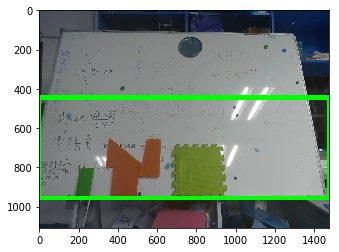

In [5]:

result = np.hstack([morph_o,dilation])
#cv2.imshow('result2', img)
#cv2.imshow('result', img)

#Show the image with matplotlib
plt.imshow(img)
plt.show()